In [1]:
import gradflow.functions as F
from gradflow.model import Model
from gradflow.optim import Adam

from datasets.mnist import MNISTDataset

import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Autoencoder(Model):
  def __init__(self, encoding_dim = 48):
    super().__init__()
    self.enc = F.Linear(28*28, encoding_dim)
    self.relu = F.ReLU()

    self.dec = F.Linear(encoding_dim, 28*28)
    self.sigmoid = F.Sigmoid()
  
  def encode(self, x):
    return self.relu(self.enc(x))

  def decode(self, x):
    return self.sigmoid(self.dec(x))
  
  def forward(self, x):
    out = self.encode(x)
    out = self.decode(out)
    return out

In [3]:
train_dset = MNISTDataset("../data/", batch_size=32*3)
test_dset = MNISTDataset("../data/", batch_size=10, train=False)

train-images-idx3-ubyte.gz already exists in ../data. Skipping...
t10k-images-idx3-ubyte.gz already exists in ../data. Skipping...
train-labels-idx1-ubyte.gz already exists in ../data. Skipping...
t10k-labels-idx1-ubyte.gz already exists in ../data. Skipping...
train-images-idx3-ubyte.gz already exists in ../data. Skipping...
t10k-images-idx3-ubyte.gz already exists in ../data. Skipping...
train-labels-idx1-ubyte.gz already exists in ../data. Skipping...
t10k-labels-idx1-ubyte.gz already exists in ../data. Skipping...


In [4]:
model = Autoencoder()
criterion = F.BCELoss()
optimizer = Adam(model.parameters(), 0.01, weight_decay=0, eps=1e-4)

In [5]:
training_loss = []
for epoch in range(2):
  for i, (imgs, labels) in enumerate(train_dset):
    optimizer.zero_grad()

    outputs = model(imgs)
    loss = criterion(outputs, imgs)
    training_loss += [loss.data]
    print(loss.data)

    loss.backward()

    optimizer.step()

    if ((i + 1) % 500 == 0):
      print(loss.data)

0.7294431
0.66662633
0.6257907
0.57217085
0.5108133
0.42534107
0.34942037
0.32386497
0.302189
0.32402104
0.29647762
0.26636586
0.30050835
0.3169185
0.2984897
0.29287001
0.2755129
0.24979366
0.24224924
0.2538875
0.26065204
0.2423741
0.22116652
0.23105422
0.22465414
0.2197132
0.22078598
0.21891296
0.22346263
0.21599925
0.20360874
0.19837596
0.18578
0.17642516
0.17665613
0.1862194
0.17955048
0.20300247
0.20423779
0.18815646
0.17459837
0.1754353
0.17837507
0.16494589
0.17309058
0.16812383
0.17989203
0.16714923
0.18301001
0.19019671
0.1907649
0.15619291
0.16461353
0.17297627
0.16246226
0.17336537
0.1666073
0.15742134
0.1584613
0.15828222
0.15217748
0.15222272
0.16916505
0.15360306
0.15446305
0.15029964
0.15122417
0.16309416
0.14474842
0.145781
0.15340428
0.16105726
0.16371953
0.14493248
0.14732738
0.16165099
0.15559556
0.14428288
0.13570546
0.14913997
0.1444454
0.157788
0.14529736
0.15435909
0.13818224
0.14456446
0.14163624
0.136781
0.14501195
0.14305672
0.1445041
0.13791454
0.14071205
0.13

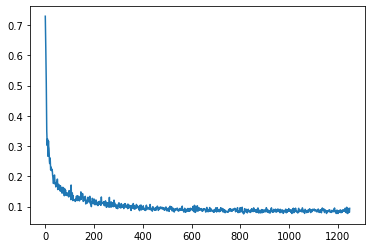

In [6]:
plt.plot(training_loss)

Encoding: [ 5.106329    2.955065    3.94864     2.5888684   3.8901885   8.511856
  4.0991344   0.26672542 10.828677    5.4925404   1.888546    1.5131004
  5.3418226   3.1775818   6.1785145   6.3538055   1.2893884   5.0249825
  4.6027575   5.282077   13.508961    4.0378957  13.3296385   2.742114
  6.3871155  -0.          2.7328415   4.342185    7.4680715   3.6642442
  6.7458367   8.185978    4.200291   -0.          4.7910247   5.4122334
  2.5455313   4.5358334   7.9476824   5.161937    3.8060458   9.527368
  3.9183693   9.524516    4.631789    4.3742614   4.675189    7.3496923 ]


Text(0.5, 1.0, 'Predicted')

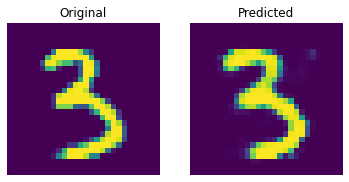

In [7]:
batch = 3
im = 2

true_imgs = test_dset[batch][0]

encodings = model.encode(true_imgs)
print("Encoding:", encodings.data[im])

pred_imgs = model.decode(encodings)

fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(true_imgs.data[im].reshape(28, 28))
plt.axis("off")
plt.title("Original")

fig.add_subplot(1, 2, 2)
plt.imshow(pred_imgs.data[im].reshape(28, 28))
plt.axis("off")
plt.title("Predicted")

In [8]:
def print_batch(batch, width, height, show_orig = True):
  true_imgs, true_labels = batch
  pred_imgs = model(true_imgs)

  i = 1
  fig = plt.figure(figsize=(height*3, width*4))
  for w in range(width):
    for h in range(height):
      idx = w * height + h
      label = np.argmax(true_labels.data[idx])

      if show_orig:
        fig.add_subplot(width * 2, height * 2, i); i+=1
        plt.imshow(true_imgs.data[idx].reshape(28, 28))
        plt.axis("off")
        plt.title(f"Original ({label})")

      fig.add_subplot(width * 2, height * 2, i); i+=1
      plt.imshow(pred_imgs.data[idx].reshape(28, 28))
      plt.axis("off")
      plt.title(f"Predicted ({label})")

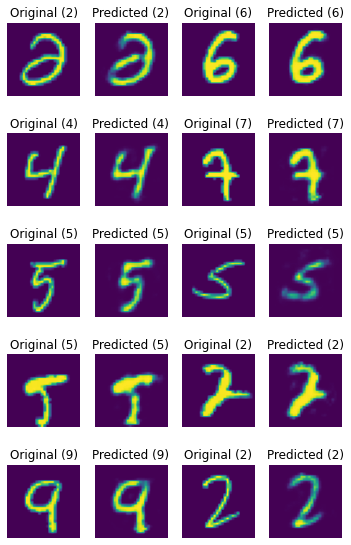

In [9]:
print_batch(test_dset[333], 5, 2)